In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("D:/Customer 360+ Final_Project/Dataset/Cleaned_dataset.csv")

In [15]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,SignupDate,TotalVisits,LastVisitDate,PreferredCategory,TotalOrders,TotalRevenue,AvgOrderValue,LastPurchaseDate,SupportTickets,SatisfactionScore,Churned,RFM_Score,CustomerSegment
0,C001,Andrea Whitney,39,Female,Pune,06-18-2024,29,11-14-2024,Books,24,40154,1673.083333,11-01-2024,1,1,No,7,New
1,C002,Jackie Ferguson,20,Female,Pune,12-07-2021,64,12-10-2024,Home Decor,23,168483,7325.347826,01-24-2025,4,5,No,7,Loyal
2,C003,Christopher Martinez,24,Female,Bengaluru,12-30-2021,42,02-27-2023,Home Decor,23,193225,8401.086957,06-04-2025,4,1,No,8,Loyal
3,C004,Melissa Archer,25,Male,Chennai,03-16-2022,12,11-01-2022,Fashion,10,22188,2218.800000,08-23-2024,2,4,Yes,6,New
4,C005,Jonathon Gomez,58,Male,Delhi,02-02-2022,52,02-28-2022,Electronics,16,182247,11390.437500,02-05-2024,2,3,No,7,At Risk


### Distribution of Age, Gender, Location

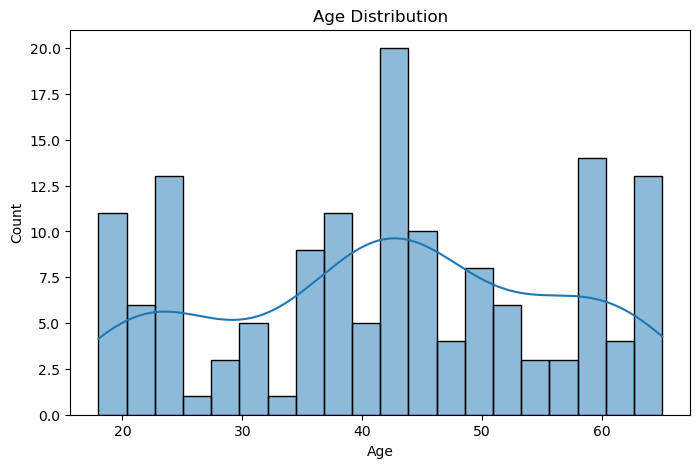

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/Age_distribution.png")
plt.show()
plt.close()

C:\Users\HP\AppData\Local\Temp\ipykernel_19116\1357253295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="Set2")


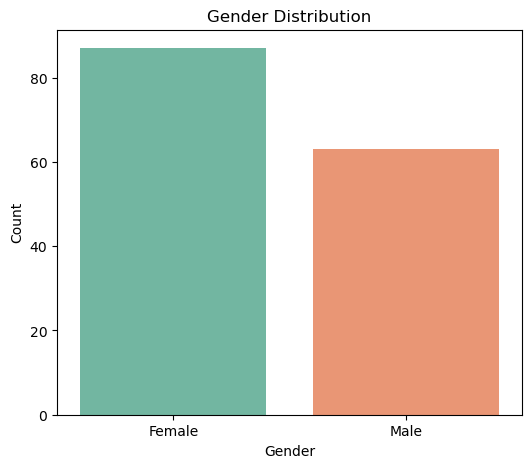

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/gender_distribution.png")
plt.show()
plt.close()

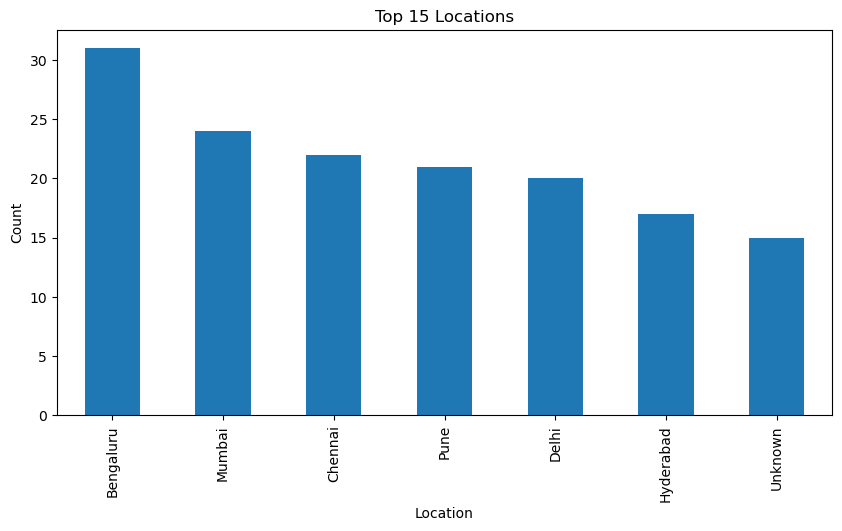

In [24]:
plt.figure(figsize=(10,5))
df['Location'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/location_distribution.png")
plt.show()
plt.close()

### Monthly / Yearly Revenue Trend

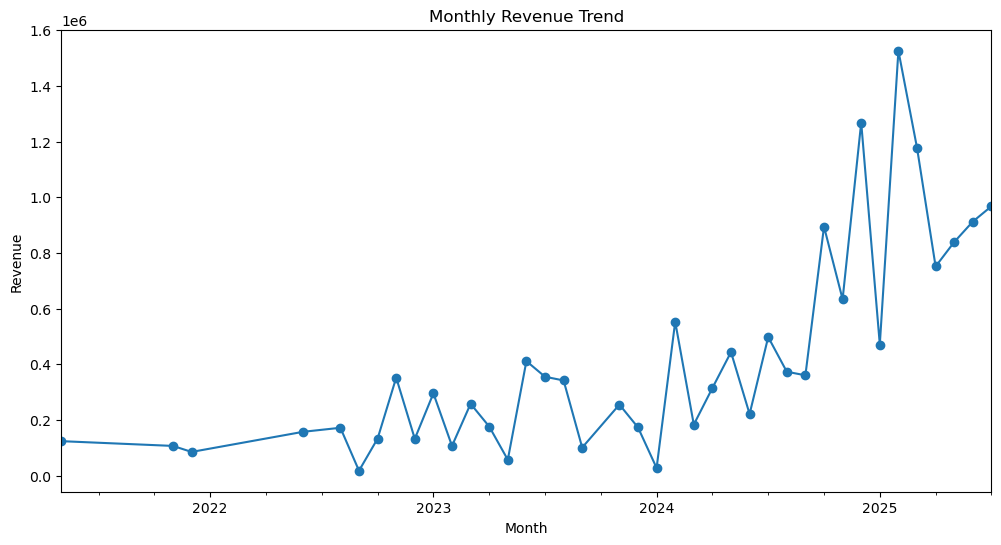

In [29]:
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])

monthly_revenue = df.groupby(df['LastPurchaseDate'].dt.to_period("M"))['TotalRevenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/monthly_revenue_trend.png")
plt.show()
plt.close()

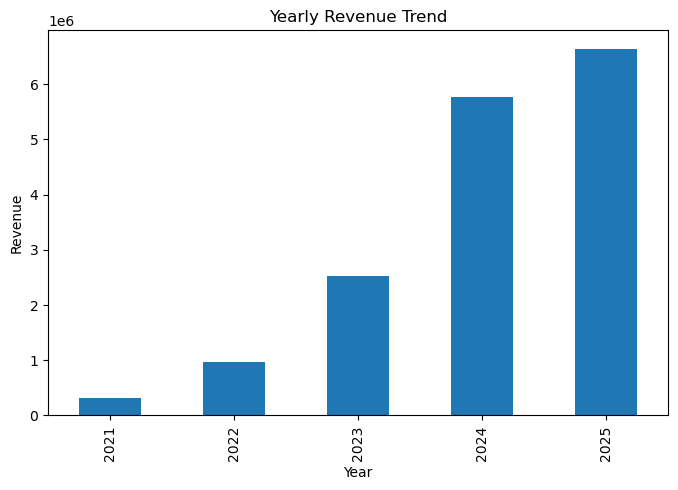

In [31]:
yearly_revenue = df.groupby(df['LastPurchaseDate'].dt.year)['TotalRevenue'].sum()

plt.figure(figsize=(8,5))
yearly_revenue.plot(kind='bar')
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/yearly_revenue_trend.png")
plt.show()
plt.close()

### Customer Segments Distribution (Loyal, At Risk, New, etc.)

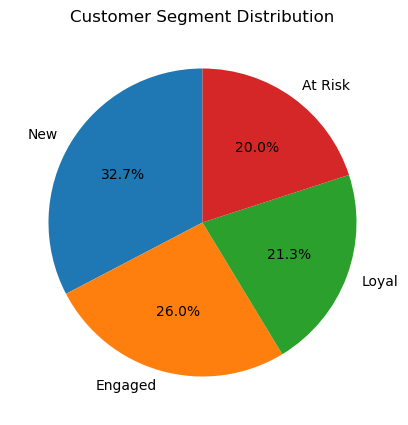

In [35]:
plt.figure(figsize=(6,5))
df['CustomerSegment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Customer Segment Distribution")
plt.ylabel("")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/customer_segments.png")
plt.show()
plt.close()

### Top 10 Customers by Revenue

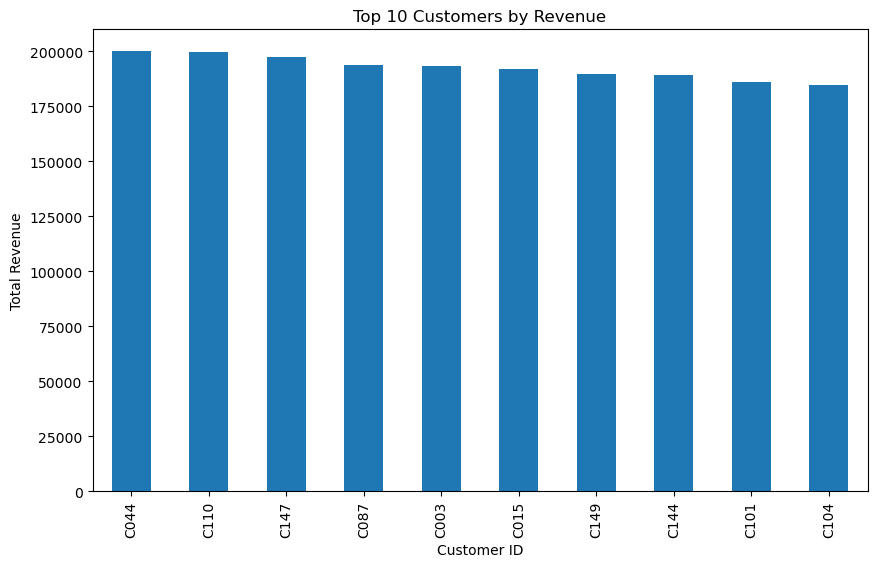

In [37]:
top_customers = df.groupby("CustomerID")['TotalRevenue'].sum().nlargest(10)

plt.figure(figsize=(10,6))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/top_customers.png")
plt.show()
plt.close()

### Average Satisfaction Score by Churned/Not Churned

C:\Users\HP\AppData\Local\Temp\ipykernel_19116\286662258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Churned", y="SatisfactionScore", data=df, estimator='mean', palette="Set3")


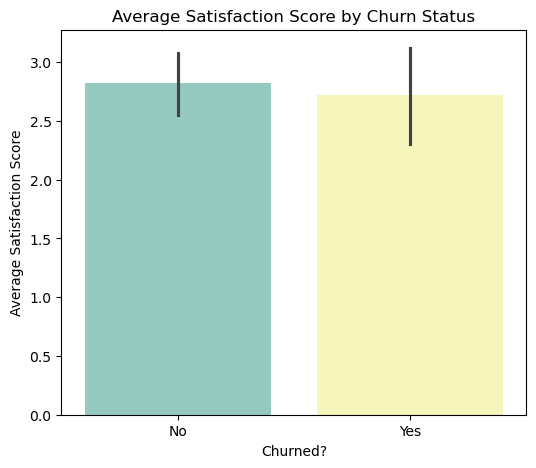

In [39]:
plt.figure(figsize=(6,5))
sns.barplot(x="Churned", y="SatisfactionScore", data=df, estimator='mean', palette="Set3")
plt.title("Average Satisfaction Score by Churn Status")
plt.xlabel("Churned?")
plt.ylabel("Average Satisfaction Score")
plt.savefig("D:/Customer 360+ Final_Project/Notebooks/02_Descriptive_Analysis/Output/satisfaction_by_churn.png")
plt.show()
plt.close()